# Analysis of the number of children in public schools German federal states

## 0. Introduction and Setup

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import src.data_lit_covid_school as dlcs
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb



## 1. Data Import and Preparation

In [55]:
from operator import index
import warnings


def load_table(path: str = "../../data/number-school-children.csv") -> pd.DataFrame:
    """Load table from destatis excel file"""
    df = pd.read_csv(os.path.join(dlcs.PACKAGE_PATH ,path), sep=";", skiprows=5, skipfooter=4, engine="python")
    df.replace("b'", "", inplace=True, regex=True)
    df.rename(columns={"b'": "School Year"}, inplace=True)
    df.rename(columns={"Baden-W\\xc3\\xbcrttemberg": "Baden-Württemberg"}, inplace=True)
    df.rename(columns={"Th\\xc3\\xbcringen": "Thüringen"}, inplace=True)
    
  
    # Generate gender column
    num_years = 26
    male = df.iloc[:num_years + 3].index
    female = df.iloc[num_years + 3:].index
    all = df.iloc[2 * num_years + 4:].index
    df["gender"] = np.nan
    df.iloc[male, -1] = "m"
    df.iloc[female, -1] = "f"
    df.iloc[all, -1] = "all"
    df.drop([1,2,29,56], inplace=True)
    # df.set_index(df.columns[0], inplace=True)
    
    # Set Federal State column
    # old_cols = df.columns.tolist()
    # df.columns = df.iloc[0].tolist()
    # df.rename(columns={"": "School Year"}, inplace=True)
    # df.iloc[0] = old_cols
    # df["Federal State"] = np.nan
    # for i in range(0, len(df.columns)-2, 3):
    #     federal_state = df.iloc[0, i]
    #     print(federal_state)
    #     df.iloc[:, -1] = federal_state
        
    temp = pd.DataFrame(columns=["Federal State", "Gender", "Type", "Value", "Year"])
    for col_index in range(1, len(df.columns)-1, 3):
        for index in df.index[1:]:
            year = df.loc[index, "School Year"]
            gender = df.loc[index, "gender"]
            federal_state = df.columns[col_index]
            temp.loc[len(temp)] = [federal_state, gender, "Pupils", df.loc[index][df.columns[col_index]], year]
            temp.loc[len(temp)] = [federal_state, gender, "School beginners", df.loc[index][df.columns[col_index + 1]], year]
            temp.loc[len(temp)] = [federal_state, gender, "School leavers (graduates and dropouts)", df.loc[index][df.columns[col_index + 2]], year]
            
    df = temp
    df['Value'] = df['Value'].str.replace("'", '')
    df.replace(" ", np.nan, inplace=True)
    df.replace("-", np.nan, inplace=True)
    df.replace("-", np.nan, inplace=True)
    df.replace("'", "", inplace=True)
    df["Value"] = df["Value"].astype(float)
    df["Year"] = df["Year"].replace("/.*", "", regex=True).astype(int)
    df = df[df["Year"] >= 1998]
    return df

# Load the data and display 
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    data = load_table()
data

,Federal State,Gender,Type,Value,Year
3,Baden-Württemberg,m,Pupils,650777.0,1998
4,Baden-Württemberg,m,School beginners,NaN,1998
5,Baden-Württemberg,m,School leavers (graduates and dropouts),58589.0,1998
6,Baden-Württemberg,m,Pupils,658612.0,1999
7,Baden-Württemberg,m,School beginners,62803.0,1999
...,...,...,...,...,...
3739,Thüringen,all,School beginners,18759.0,2021
3740,Thüringen,all,School leavers (graduates and dropouts),17811.0,2021
3741,Thüringen,all,Pupils,205640.0,2022
3742,Thüringen,all,School beginners,19518.0,2022


# Plot the number of school children per federal state per year

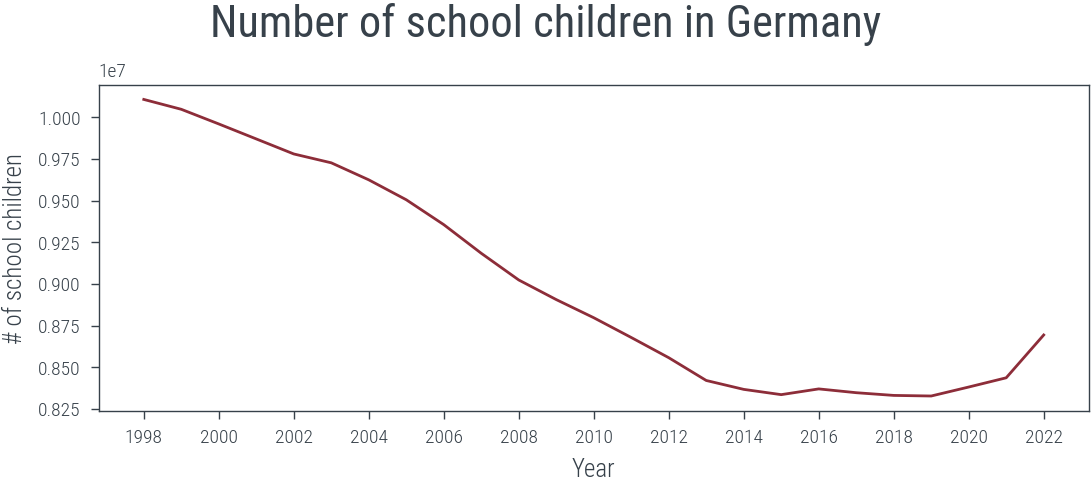

In [69]:
# Plot the data
fig, ax = plt.subplots(1, 1)


aggregated = data.groupby(["Year", "Gender", "Type"]).apply(lambda x: x["Value"].sum()).reset_index()
aggregated.rename(columns={0: "Value"}, inplace=True)

male = aggregated.loc[aggregated["Gender"] == "m"]
female = aggregated.loc[aggregated["Gender"] == "f"]
all = aggregated.loc[aggregated["Gender"] == "all"]

ax.plot(all[all["Type"] == "Pupils"]["Year"], all[all["Type"] == "Pupils"]["Value"])

ax.set_xlabel("Year")
ax.set_ylabel("# of school children")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))

# Other settings
fig.suptitle("Number of school children in Germany", fontsize=16)

plt.show()

     Year Gender                                     Type       Value
9    1999    all                                   Pupils  10048395.0
10   1999    all                         School beginners    836137.0
11   1999    all  School leavers (graduates and dropouts)    933616.0
18   2000    all                                   Pupils   9960447.0
19   2000    all                         School beginners    811955.0
..    ...    ...                                      ...         ...
208  2021    all                         School beginners    770682.0
209  2021    all  School leavers (graduates and dropouts)    769411.0
216  2022    all                                   Pupils   8693344.0
217  2022    all                         School beginners    813540.0
218  2022    all  School leavers (graduates and dropouts)         0.0

[72 rows x 4 columns]


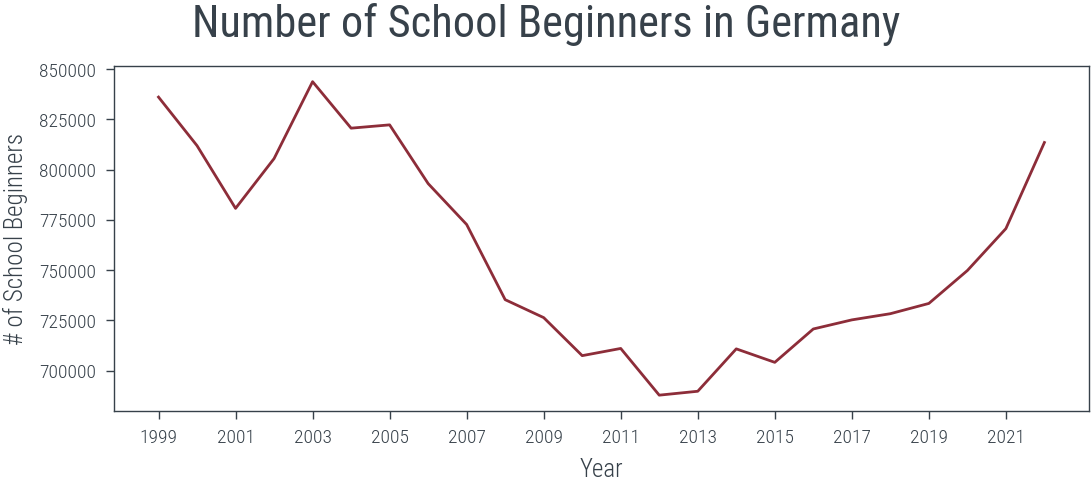

In [67]:
# Plot the data
fig, ax = plt.subplots(1, 1)


aggregated = data.groupby(["Year", "Gender", "Type"]).apply(lambda x: x["Value"].sum()).reset_index()
aggregated = aggregated[aggregated["Year"] >= 1999]
aggregated.rename(columns={0: "Value"}, inplace=True)

male = aggregated.loc[aggregated["Gender"] == "m"]
female = aggregated.loc[aggregated["Gender"] == "f"]
all = aggregated.loc[aggregated["Gender"] == "all"]
ax.plot(all[all["Type"] == "School beginners"]["Year"], all[all["Type"] == "School beginners"]["Value"])

ax.set_xlabel("Year")
ax.set_ylabel("# of School Beginners")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))

# Other settings
fig.suptitle("Number of School Beginners in Germany", fontsize=16)

plt.show()

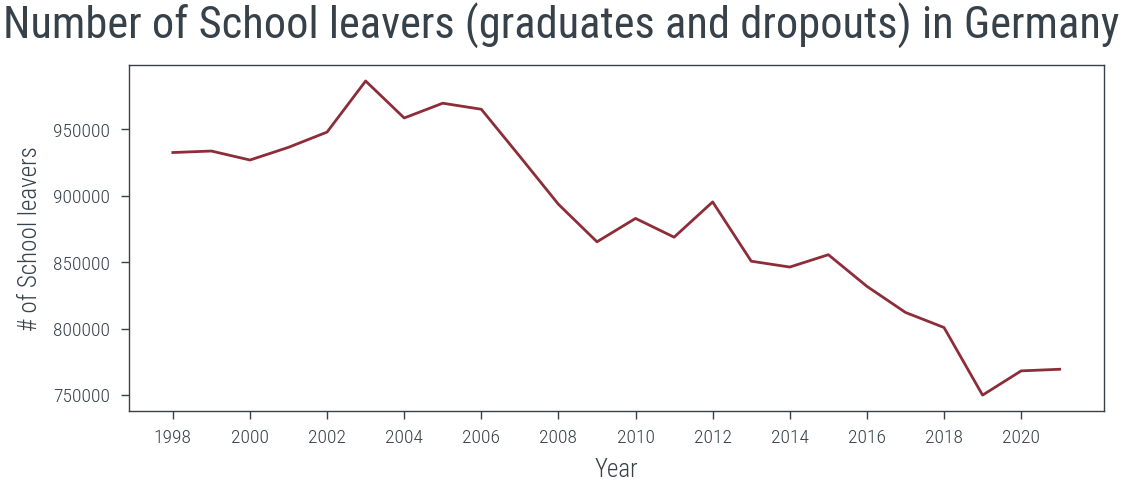

In [74]:
# Plot the data
fig, ax = plt.subplots(1, 1)


aggregated = data.groupby(["Year", "Gender", "Type"]).apply(lambda x: x["Value"].sum()).reset_index()
aggregated = aggregated[aggregated["Year"] <= 2021]
aggregated.rename(columns={0: "Value"}, inplace=True)

male = aggregated.loc[aggregated["Gender"] == "m"]
female = aggregated.loc[aggregated["Gender"] == "f"]
all = aggregated.loc[aggregated["Gender"] == "all"]
ax.plot(all[all["Type"] == "School leavers (graduates and dropouts)"]["Year"], all[all["Type"] == "School leavers (graduates and dropouts)"]["Value"])

ax.set_xlabel("Year")
ax.set_ylabel("# of School leavers")
ax.set_xticks(np.arange(all["Year"].min(), all["Year"].max() + 1, 2))

# Other settings
fig.suptitle("Number of School leavers (graduates and dropouts) in Germany", fontsize=16)

plt.show()